# b = 3 において、hopLを1から2に上げるとなぜ協力率が大きく下がるのか？

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

### 20211230_191225_detail.csv

```
trial_count = 100
agent_count = 100
generations = 20

network_type = :scale_free_4
hop_game = 1
n_game = 4
n_learning = 4
μ = 0.00

b_list = [3.0]
hop_learning_list = [1, 2]
```

In [2]:
def degree_level(degree: int) -> str:
    return 'hige' if degree >= 4 else 'low'

In [3]:
csv_file_path = 'data/20211230_191225_detail.csv'
df = pd.read_csv(csv_file_path, header=None, names=[
    'b', 'hop_learning', 'trial', 'Step', 'agent_id', 'Strategy', 'Payoff', 'Degree'
])
df = df[df.Step <= 20]
df.shape

(400000, 8)

In [4]:
%%time
df['cooperator_rate'] = df.Strategy.apply(lambda x: int(x == 'C'))
df['Degree_Level'] = df.Degree.apply(degree_level)
params = list(itertools.product(set(df.b), set(df.hop_learning)))

CPU times: user 182 ms, sys: 3.55 ms, total: 185 ms
Wall time: 184 ms


In [5]:
cooperator_rate_df = df.groupby(['b', 'hop_learning', 'Step']).agg({'cooperator_rate': np.mean}).reset_index()
cooperator_rate_per_degree_level_df = df.groupby(['b', 'hop_learning', 'Step', 'Degree_Level']).agg({'cooperator_rate': np.mean}).reset_index()
payoff_df = df.groupby(['b', 'hop_learning', 'Step', 'Strategy']).agg({'Payoff': np.mean}).reset_index()
payoff_per_degree_level_df = df.groupby(['b', 'hop_learning', 'Step', 'Strategy', 'Degree_Level']).agg({'Payoff': np.mean}).reset_index()

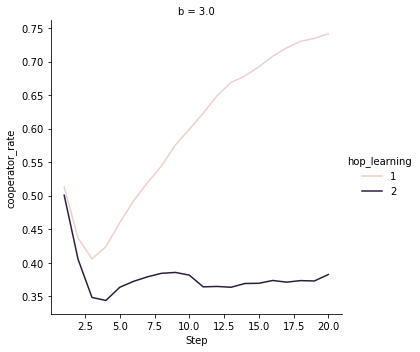

In [6]:
sns.relplot(
    data=cooperator_rate_df,
    x='Step',
    y='cooperator_rate',
    col='b',
    hue='hop_learning',
    kind='line',
)

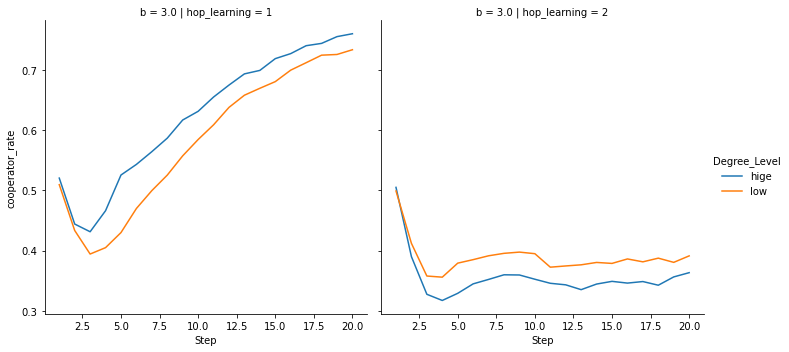

In [8]:
sns.relplot(
    data=cooperator_rate_per_degree_level_df,
    x='Step',
    y='cooperator_rate',
    row='b',
    col='hop_learning',
    hue='Degree_Level',
    kind='line'
)

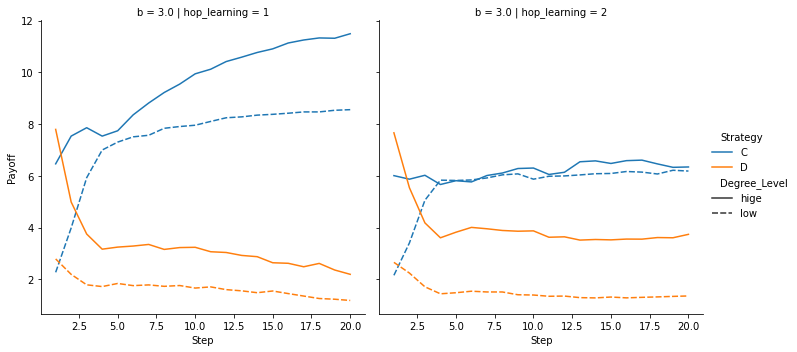

In [9]:
sns.relplot(
    data=payoff_per_degree_level_df,
    x='Step',
    y='Payoff',
    row='b',
    col='hop_learning',
    hue='Strategy',
    style='Degree_Level',
    kind='line'
)

- b = 2 の場合の問い。
    - b=2なので最初に一気に協力者が減る。その後、なぜか全滅を免れて生き残る。なぜか？
        - 生き残った協力者のペイオフは非協力者のペイオフよりも低いのに。
    - しかも、hop_learningを上げると、協力者が生き残る率が上がるなぜか？
- b = 3 の場合の問い。
    - hop_learning = 1 の場合は説明可能。ハブの力で協力者が大勢を占める。しかし非協力者も生き残る。言われてみれば、非協力者が生き残る理由は、どう説明してよいか分からない。
    - hop_learning = 2 で一気に協力者が減るのはなぜか？

# ムラは本当に存在するのか？

協力村や非協力村というものが存在するのか？

効いているのはグループ淘汰ではないのではないか？

次数10以上のハブをピックアップする。それぞれのハブの隣人に占める協力者の比率にバラツキがあるか確認する。バラツキが有るなら協力村や非協力村が存在すると考えられる。バラツキが無く全部同じ様な比率なら、村は存在しない。

payoff は見なくて良さそう。

結局1〜5ステップぐらいでコミュニティを形成できるかどうかがポイント。hopL = 1だとコミュニティが形成できるが、hopL = 2 だとコミュニティを形成できないことを示してやれば良い。

hopLが2になると、コミュニティを形成できず、ずっとフリーライドされ放題になってしまう。

で、なぜ、hopL = 1だとコミュニティが形成できるが、hopL = 2 だとコミュニティを形成できないのか？

で、なぜミニモデルで再現できない？→コミュニティ形成後の状態を前提にしているから。コミュニティ形成前の状態からスタートすれば再現できるはず。

要は、リーフの力は何もないところからコミュニティを作り出すほどの力ではない。たまたまコミュニティがあったら、それをトリガーにリーフの協力率を上げるに過ぎない。しかし、hopLが高まるとその力は少しずつ強まる。

一方、ハブの力は、なにもないところからコミュニティを作り出すパワーが有る。しかし、hopLが高まるとその力は急激に落ちる。だから、なんで？